In [ ]:
import numpy as np
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
frame1 = '/content/gdrive/My Drive/rod2.jpg'
print(frame1)

/content/gdrive/My Drive/rod2.jpg


In [ ]:
import cv2
from skimage.color import rgb2hsv,hsv2rgb
import numpy as np


def  HSVStretching(sceneRadiance):
    sceneRadiance = np.uint8(sceneRadiance)
    height = len(sceneRadiance)
    width = len(sceneRadiance[0])
    img_hsv = rgb2hsv(sceneRadiance)
    h, s, v = cv2.split(img_hsv)
    img_s_stretching = global_stretching(s, height, width)
    img_v_stretching = global_stretching(v, height, width)

    labArray = np.zeros((height, width, 3), 'float64')
    labArray[:, :, 0] = h
    labArray[:, :, 1] = img_s_stretching
    labArray[:, :, 2] = img_v_stretching
    img_rgb = hsv2rgb(labArray) * 255

    # img_rgb = np.clip(img_rgb, 0, 255)

    return img_rgb

In [ ]:
import numpy as np

def sceneRadianceRGB(sceneRadiance):

    sceneRadiance = np.clip(sceneRadiance, 0, 255)
    sceneRadiance = np.uint8(sceneRadiance)

    return sceneRadiance



In [ ]:
import numpy as np

def global_stretching(img_L,height, width):
    I_min = np.min(img_L)
    I_max = np.max(img_L)
    I_mean = np.mean(img_L)
    I_min1 = (np.ones((256,256)) *I_min).astype(int)
    I_max1 = (np.ones((256,256)) *I_max).astype(int)
    array_Global_histogram_stretching_L = np.zeros((height, width))
    pout = (img_L -I_min1) /(I_max1 - I_min1)

    return pout



In [ ]:
import numpy as np
import concurrent.futures
import copy

 
def stretching(img):
    height = len(img)
    width = len(img[0])
    with concurrent.futures.ThreadPoolExecutor() as executor:
      input=[img[:, :, 2],img[:, :, 1],img[:, :, 0]]
      inp=[0,1,2]
      h=[height,height,height]
      w=[width,width,width]
      # zipped = zip(input,h,w,inp)
      # li_result = list(zipped)
      
      # print(img[:, :, 2].shape)
      results=executor.map(histogram_general,input,h,w,inp)
      
      i=0
      for result in results:
        input[i]=result
        i=i+1
        
    return img

import numpy as np


def cal_equalisation(img,ratio):
    Array = img * ratio
    Array = np.clip(Array, 0, 255)
    return Array

def RGB_equalisation(img):
    i =0
    img = np.float32(img)
    avg_RGB = []
    for i in range(3):
        avg = np.mean(img[:,:,i])
        avg_RGB.append(avg)
    # print('avg_RGB',avg_RGB)
    a_r = avg_RGB[0]/avg_RGB[2]
    a_g =  avg_RGB[0]/avg_RGB[1]
    ratio = [0,a_g,a_r]
    for i in range(1,3):
        img[:,:,i] = cal_equalisation(img[:,:,i],ratio[i])
    return img

In [ ]:
import numpy as np
import concurrent.futures
import copy

def histogram_general(r_array,height, width,input):
    
    length = height * width
    R_rray=np.zeros(r_array.shape)
    R_rray = np.copy(r_array)
    R_rray=R_rray.flatten()
    R_rray.sort()
    I_min = int(R_rray[int(length / 500)])
    I_max = int(R_rray[-int(length / 500)])
    zero = (np.ones((256,256)) *0).astype(int)

    maxi = (np.ones((256,256)) *255).astype(int)

    I_max1 = (np.ones((256,256)) *I_max).astype(int)
    I_min1 = (np.ones((256,256)) *I_min).astype(int) 
    p_out0 = ((r_array - I_min1) * ((255 - I_min1) / (I_max1 - I_min1)))+ I_min1
    p_out1 = ((r_array - I_min1) * ((255) / (I_max1 - I_min1)))
    p_out2 = ((r_array - I_min1) * ((I_max1) / (I_max1 - I_min1)))



    array_Global_histogram_stretching = np.zeros((height, width))
    if input == 0:
        c = np.where(r_array < I_min1, I_min , p_out0)
        c = np.where(r_array > I_max1, maxi, c)
    elif input == 1:
        c = np.where(r_array < I_min1, zero, p_out1)
        c = np.where(r_array > I_max1, maxi, c)
    elif input == 2 :
        c = np.where(r_array < I_min1, zero, p_out2)
        c = np.where(r_array > I_max1, I_max, c)
    return c
  
    



RGB_equalisation:  0.0011586309992708266 0
stretching  0.016641817001072923 0
HSVStretching:  0.02955382300024212 0
sceneRadianceRGB:  0.002675372001249343 0
Time per image  0.08337753699925088 0


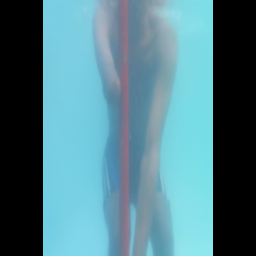

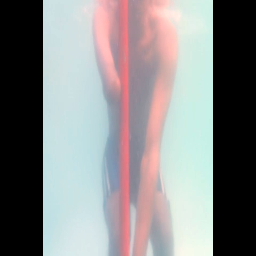

In [ ]:
import os
import numpy as np
import cv2
import natsort
import xlwt
import datetime



np.seterr(over='ignore')
if __name__ == '__main__':
    pass
count = 0
import timeit
starti = timeit.default_timer()
frame = cv2.imread(frame1)
frame = cv2.resize(frame , (256,256))

# check for successfulness of cap.read()
start = timeit.default_timer()
sceneRadiance = RGB_equalisation(frame)
stop = timeit.default_timer()
print('RGB_equalisation: ', stop - start ,count)

start = timeit.default_timer()
sceneRadiance = stretching(sceneRadiance)
stop = timeit.default_timer()
print('stretching ', stop - start ,count)
# # cv2.imwrite(folder + '/OutputImages/' + Number + 'Stretched.jpg', sceneRadiance)
start = timeit.default_timer()
sceneRadiance = HSVStretching(sceneRadiance)
stop = timeit.default_timer()
print('HSVStretching: ', stop - start ,count)

start = timeit.default_timer()
sceneRadiance = sceneRadianceRGB(sceneRadiance)
stop = timeit.default_timer()
print('sceneRadianceRGB: ', stop - start ,count)
# Save the video
stopi = timeit.default_timer()
print('Time per image ', stopi - starti ,count)
cv2_imshow(frame)
cv2_imshow(sceneRadiance)
# cv2_imshow(image) # Note cv2_imshow, not cv2.imshow


In [ ]:
import numba

In [ ]:
matrix = np.array([[[0,0.5,0.6],[0.9,1.2,0]],[[0,0.5,0.6],[0.9,1.2,0]]])
matrix[np.where((matrix > 0.55) & (matrix < 0.95))] = matrix * 0.5
print(matrix)


ValueError: ignored

In [ ]:
start = timeit.default_timer()
frame = cv2.imread(frame1)
frame = cv2.resize(frame , ((256,256)))
r_array = frame[:,:,1]
"""r_array = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
r_array1 = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])"""
print(r_array)
r1 = np.zeros((256,256))


array_Global_histogram_stretching = np.zeros((256,256))
I_max1 = 220
I_min1 = 200
I_max = (np.ones((256,256)) *220).astype(int)
I_min = (np.ones((256,256)) *200).astype(int)


maxi = (np.ones((256,256)) *255).astype(int)
zero = (np.ones((256,256)) *0).astype(int)
r1 = ((r_array - I_min) * ((I_max) / (I_max - I_min)))

#print(r1)
zero = np.zeros((256,256))
c = np.where(r_array < I_min1, zero, r1)
c1 = np.where(r_array > I_max1, I_max, c)
print(c)
stop1 = timeit.default_timer()
for i in range(0, 256):
  for j in range(0, 256):
      if r_array[i][j] < I_min1:
          # p_out = r_array[i][j]
          array_Global_histogram_stretching[i][j] = 0
      elif (r_array[i][j] > I_max1):
          # p_out = r_array[i][j]
          array_Global_histogram_stretching[i][j] = I_max1
      else:
          p_out = int((r_array[i][j] - I_min1) * ((I_max1) / (I_max1 - I_min1)))
          array_Global_histogram_stretching[i][j] = p_out

print(c1.astype(int))
print(array_Global_histogram_stretching.astype(int))


stop2 = timeit.default_timer()
print(start - stop1)
print(stop1 - stop2)
comparison = c1.astype(int) == array_Global_histogram_stretching.astype(int)
equal_arrays = comparison.all()
print(equal_arrays)